# 데이터 시각화 연습문제 (3) - seaborn 막대, 빈도 그래프

다음의 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

https://data.hossam.kr/D01/mpg.xlsx

### 문제 1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

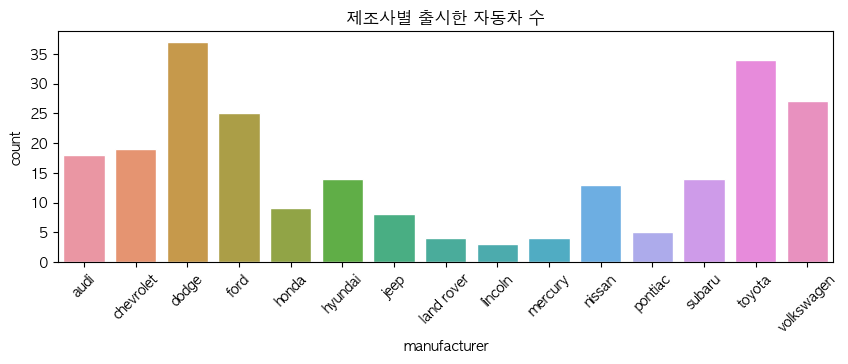

In [281]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

data_pre1 = read_excel('https://data.hossam.kr/D01/mpg.xlsx')

data_pre2 = data_pre1.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})
data_pre2.dtypes
data = data_pre2.sort_values('manufacturer')
data

plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == "darwin" else "Malgun Gothic"
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False

brandname = []
for a in data['manufacturer']:
    if a in brandname:
        continue
    else:
        brandname.append(a)
brandname.sort()

sb.countplot(data=data, x='manufacturer', edgecolor = '1')
plt.title("제조사별 출시한 자동차 수")
plt.xticks(list(range(len(brandname))), brandname, rotation = 45)
plt.show()
plt.close()

### 문제 2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

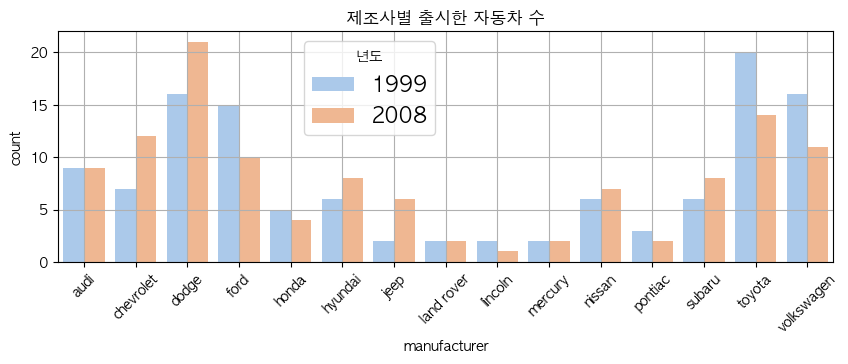

In [280]:
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

data_pre1 = read_excel('https://data.hossam.kr/D01/mpg.xlsx')

data_pre2 = data_pre1.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})
data_pre2.dtypes
data = data_pre2.sort_values('manufacturer')
data

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False

brandname = []
for a in data['manufacturer']:
    if a in brandname:
        continue
    else:
        brandname.append(a)
brandname.sort()


sb.countplot(data=data, x='manufacturer', hue = 'year', palette = 'pastel')
plt.title("제조사별 출시한 자동차 수")
plt.xticks(list(range(len(brandname))), brandname, rotation = 45)
plt.legend(title = '년도', bbox_to_anchor = (0.5, 1), fontsize = 15)
plt.grid()
plt.show()
plt.close()

### 문제 3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

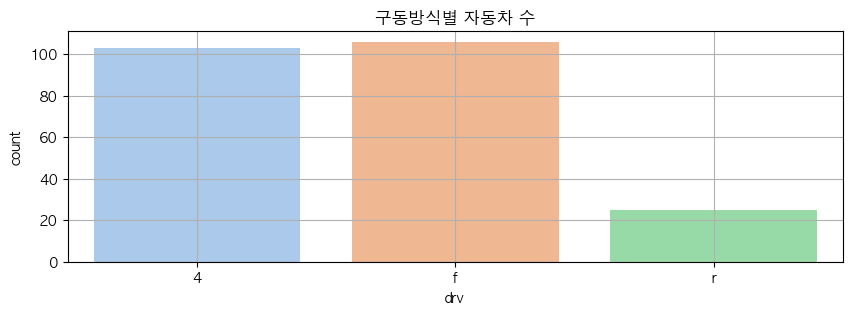

In [279]:
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

data_pre1 = read_excel('https://data.hossam.kr/D01/mpg.xlsx')

data = data_pre1.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})
data.dtypes

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False


sb.countplot(data=data, x='drv')
plt.title("구동방식별 자동차 수")
plt.grid()
plt.show()
plt.close()

### 문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오

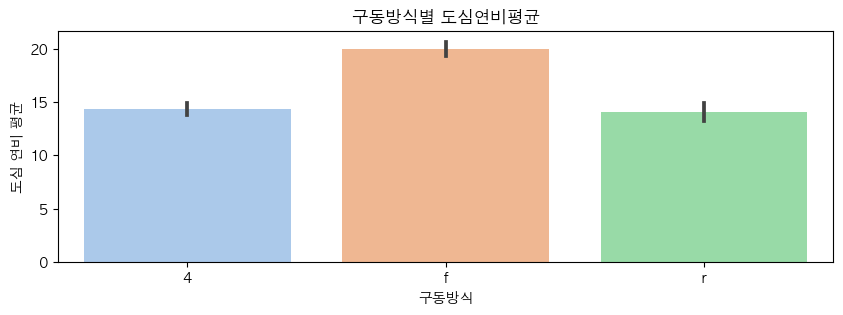

In [282]:
import seaborn as sb
from pandas import DataFrame, read_excel
from matplotlib import pyplot as plt

data_pre1 = read_excel('https://data.hossam.kr/D01/mpg.xlsx')
data = data_pre1.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False

sb.barplot(data=data, x='drv', y = 'cty', palette = 'pastel', estimator = 'mean')
plt.title ('구동방식별 도심연비평균')
plt.xlabel('구동방식')
plt.ylabel('도심 연비 평균')
plt.show()
plt.close()

### 문제 5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

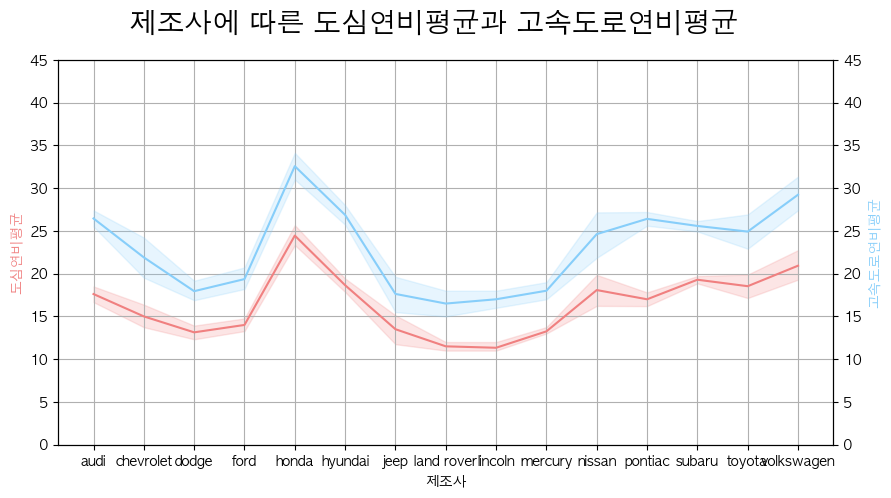

In [285]:
import seaborn as sb
from pandas import DataFrame, read_excel
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성
fig.suptitle('제조사에 따른 도심연비평균과 고속도로연비평균', fontsize = 20)

# ax1에 그래프 그리기
sb.lineplot(data = data, x = 'manufacturer', y = 'cty', ax=ax1, color = 'lightcoral' )
ax1.set_xlabel('제조사')
ax1.set_ylabel('도심연비평균', color = 'lightcoral')
ax1.set_ylim(0, 45)
ax1.grid()

# ax2에 그래프 그리기
sb.lineplot(data = data, x = 'manufacturer', y = 'hwy', ax=ax2, color = 'lightskyblue')
ax2.set_ylabel('고속도로연비평균', color = 'lightskyblue')
ax2.set_ylim(0, 45)

plt.show()
plt.close()

### 문제 6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

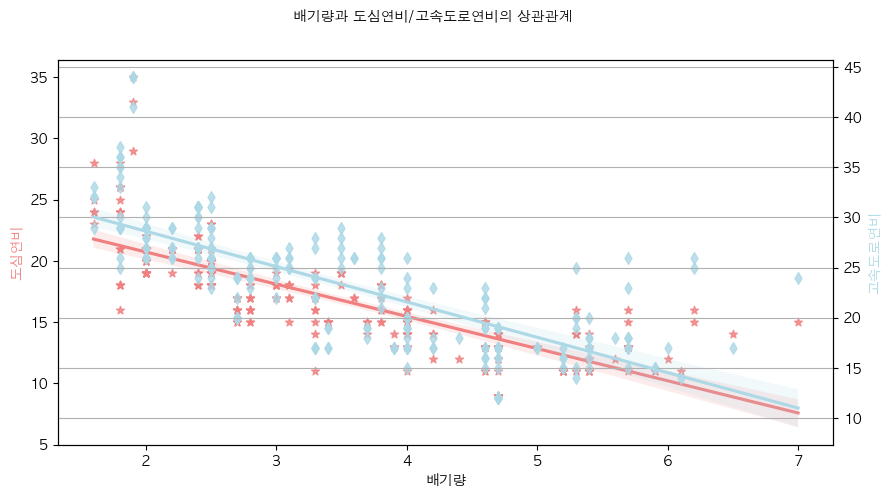

In [290]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

data = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
data

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.unicode_minus'] = False



# 추세선을 함께 보여주는 산점도 그래프 그리기
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax2 = ax1.twinx()
fig.suptitle('배기량과 도심연비/고속도로연비의 상관관계', fontsize = 10)

sb.regplot(data = data, x = 'displ', y = 'cty', label = '도심연비', marker='*',
          line_kws = {'color': 'lightcoral'}, scatter_kws = {'color': 'lightcoral'}, ax = ax1)
sb.regplot(data = data, x = 'displ', y = 'hwy', label = '고속도로연비', marker='d',
          line_kws = {'color': 'lightblue'}, scatter_kws = {'color': 'lightblue'}, ax = ax2)
ax1.set_xlabel('배기량')
ax1.set_ylabel('도심연비', color = 'lightcoral')
ax2.set_ylabel('고속도로연비', color = 'lightblue')
plt.grid()
plt.show()
plt.close()

### 문제 7

철수는 새로 자동차를 구입하고자 한다.

좋은 자동차를 구입하는데 있어서 가장 중요시 되는 조건은 평균연비이다.

데이터 전처리 요구사항
1. 데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.
2. 전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 표시할 수 있는 파생변수를 평가라는 이름으로 추가하시오.
3. 평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 80점 이상일 경우 B, 70점 이상일 경우 C, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가하시오.

다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

- 자동차 구동방식별 평가에 대한 빈도
- 자동차 구동방식별 등급에 대한 빈도
- 자동차 연료 종류 평가에 대한 빈도
- 자동차 연료 종류 등급에 대한 빈도
- 자동차 분류별 평가에 대한 빈도
- 자동차 분류별 등급에 대한 빈도

/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_10036/2474157348.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['등급'][a] = 'A'
/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_10036/2474157348.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['등급'][a] = 'A'
/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_10036/2474157348.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['등급'

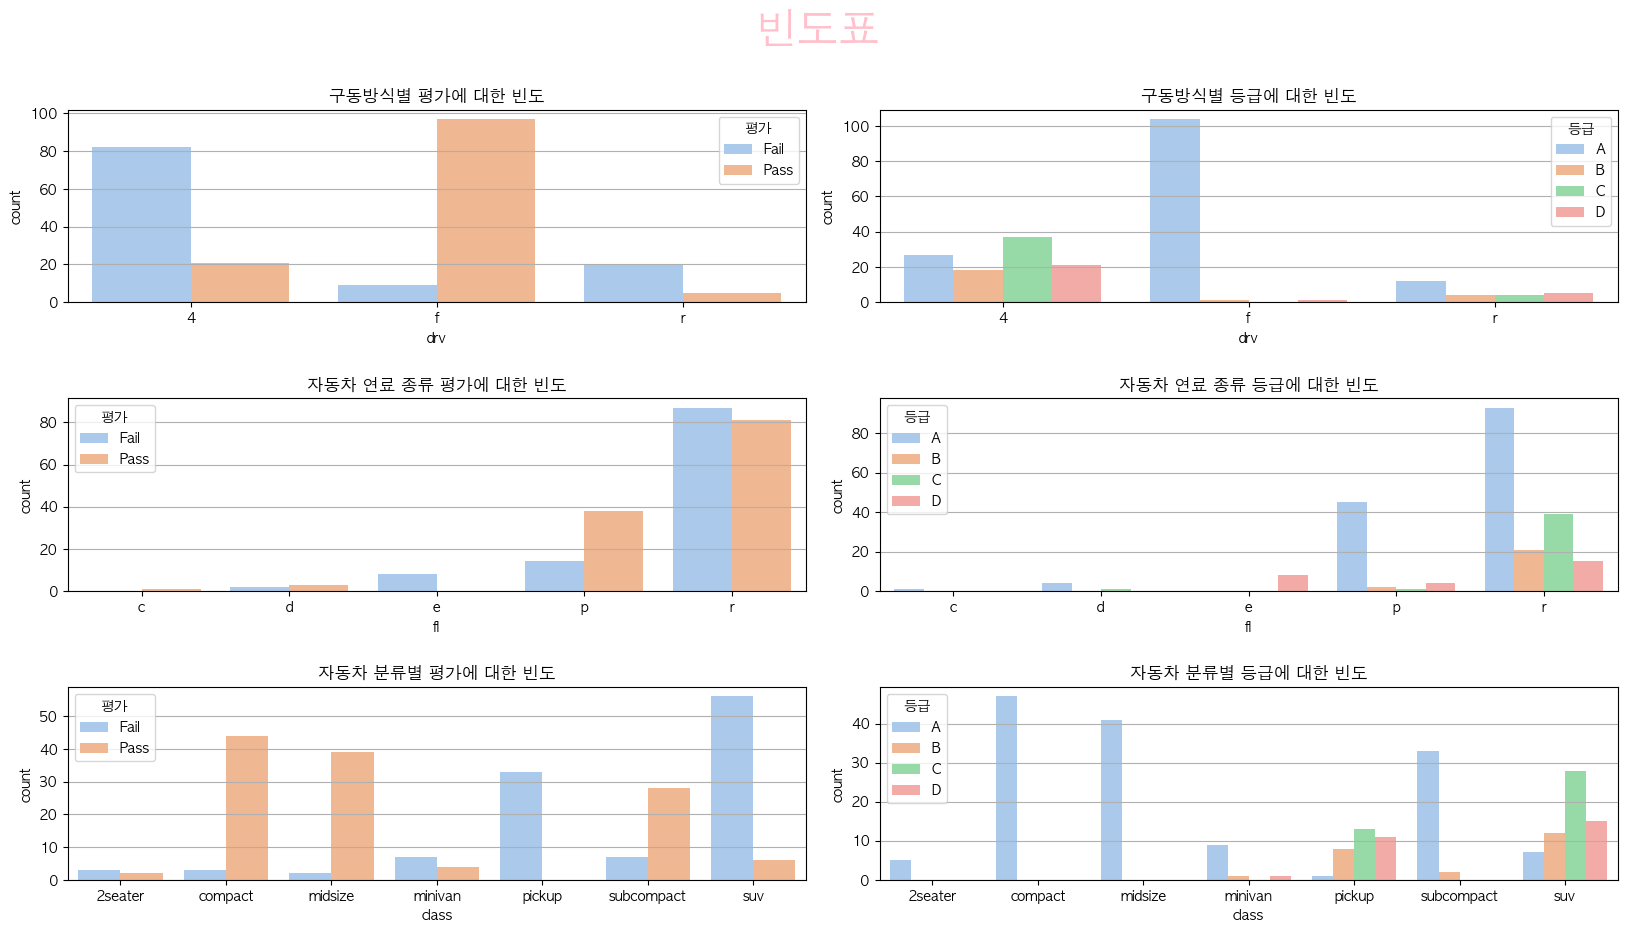

In [293]:
import sys
import seaborn as sb
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as pyplot

data = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
data

# 자동차별 평균연비 생성
data1 = data.copy()
data1['평균연비'] = data1.iloc[:, 8:10].mean(axis=1)
ave_cost = data1['평균연비'].mean()

# 자동차의 평균연비 별 평가 컬럼 생성
data1['평가'] = np.where(data1['평균연비'] > ave_cost, 'Pass', 'Fail')

# 자동차의 평균연비 백분율 별 등급 컬럼 생성
data1['평균연비_백분율'] = data1['평균연비']/ave_cost * 100
data1['등급'] = 'None'
for a in range(len(data1['평균연비_백분율'])):
    if data1['평균연비_백분율'][a] >= 90:
        data1['등급'][a] = 'A'
    elif 90 > data1['평균연비_백분율'][a] >= 80:
        data1['등급'][a] = 'B'
    elif 80 > data1['평균연비_백분율'][a] >= 70:
        data1['등급'][a] = 'C'
    else:
        data1['등급'][a] = 'D'

# 데이터 타입 확인
data2 = data1.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category', '평가': 'category', '등급': 'category'})

# 그래프 전체 영역 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.unicode_minus'] = False

# 서브플롯 생성
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('빈도표', fontsize = 30, color = 'pink')
fig.subplots_adjust(wspace = 0.1, hspace = 0.5)

# ax1: 자동차 구동방식별 평가에 대한 빈도
ax1.set_title("구동방식별 평가에 대한 빈도")
ax1.grid()
sb.countplot(data=data2, x='drv', hue = '평가', ax = ax1)

# ax2: 자동차 구동방식별 등급에 대한 빈도
ax2.set_title("구동방식별 등급에 대한 빈도")
ax2.grid()
sb.countplot(data=data2, x='drv', hue = '등급', ax = ax2)

# ax3: 자동차 연료 종류 평가에 대한 빈도
ax3.set_title("자동차 연료 종류 평가에 대한 빈도")
ax3.grid()
sb.countplot(data=data2, x='fl', hue = '평가', ax = ax3)

# ax4: 자동차 연료 종류 등급에 대한 빈도
ax4.set_title("자동차 연료 종류 등급에 대한 빈도")
ax4.grid()
sb.countplot(data=data2, x='fl', hue = '등급', ax = ax4)

# ax5: 자동차 분류별 평가에 대한 빈도
ax5.set_title("자동차 분류별 평가에 대한 빈도")
ax5.grid()
sb.countplot(data=data2, x='class', hue = '평가', ax = ax5)

# ax6: 자동차 분류별 등급에 대한 빈도
ax6.set_title("자동차 분류별 등급에 대한 빈도")
ax6.grid()
sb.countplot(data=data2, x='class', hue = '등급', ax = ax6)

sb.set_palette(sb.color_palette('pastel')) # hue 색상 지정

plt.show()
plt.close()